In [40]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns

In [42]:
df = pd.read_csv('Alzheimer.csv')
df

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,Secondary School,67.0,0,1,Yes,Private,Normal,228.69,36.6,formerly smoked,1
1,51676,Bachelor,61.0,0,0,Yes,Freelance,High,202.21,NaN,never smoked,1
2,35112,Secondary School,80.0,0,1,Yes,Private,High,105.92,32.5,never smoked,1
3,67182,Bachelor,49.0,0,0,Yes,Private,Normal,171.23,34.4,smokes,1
4,1665,Bachelor,79.0,1,0,Yes,Freelance,High,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4095,68398,Secondary School,82.0,1,0,Yes,Freelance,High,71.97,28.3,never smoked,0
4096,14180,Bachelor,13.0,0,0,No,Farmer,High,103.08,18.6,Unknown,0
4097,44873,Bachelor,81.0,0,0,Yes,Freelance,Normal,125.20,40.0,never smoked,0
4098,19723,Bachelor,35.0,0,0,Yes,Freelance,High,82.99,30.6,never smoked,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HN              4100 non-null   int64  
 1   Education       4100 non-null   object 
 2   age             4100 non-null   float64
 3   hypertension    4100 non-null   int64  
 4   heart_disease   4100 non-null   int64  
 5   family history  4100 non-null   object 
 6   Occupation      4100 non-null   object 
 7   Triglycerides   4100 non-null   object 
 8   Blood Sugar     4100 non-null   float64
 9   BMI             3936 non-null   float64
 10  smoking_status  4100 non-null   object 
 11  alzheimer       4100 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 384.5+ KB


# Preprocessing Data

Label Encoder

In [44]:
#LabelEncoder to Encode Multiple Columns
from sklearn.preprocessing import LabelEncoder

cols = ['Education', 'family history', 'Occupation', 'Triglycerides', 'smoking_status']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,1,67.0,0,1,1,4,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,1,0,202.21,NaN,2,1
2,35112,1,80.0,0,1,1,4,0,105.92,32.5,2,1
3,67182,0,49.0,0,0,1,4,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.0,2,1


In [45]:
#Check for missing values
df.isna().sum()

HN                  0
Education           0
age                 0
hypertension        0
heart_disease       0
family history      0
Occupation          0
Triglycerides       0
Blood Sugar         0
BMI               164
smoking_status      0
alzheimer           0
dtype: int64

# Hanlde missing value of BMI Column

In [46]:
df_filter = df.loc[df['BMI'].notnull(),:]
df_filter['alzheimer'].value_counts()

0    3734
1     202
Name: alzheimer, dtype: int64

In [47]:
#fill na in BMI column with mean
df = df.dropna(subset=['BMI'])

In [48]:
df.isna().sum()

HN                0
Education         0
age               0
hypertension      0
heart_disease     0
family history    0
Occupation        0
Triglycerides     0
Blood Sugar       0
BMI               0
smoking_status    0
alzheimer         0
dtype: int64

In [49]:
df.alzheimer.value_counts()

0    3734
1     202
Name: alzheimer, dtype: int64

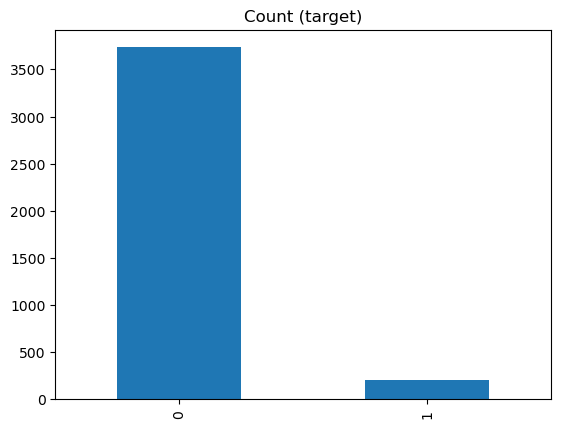

In [50]:
target_count = df.alzheimer.value_counts()
target_count.plot(kind='bar', title='Count (target)');

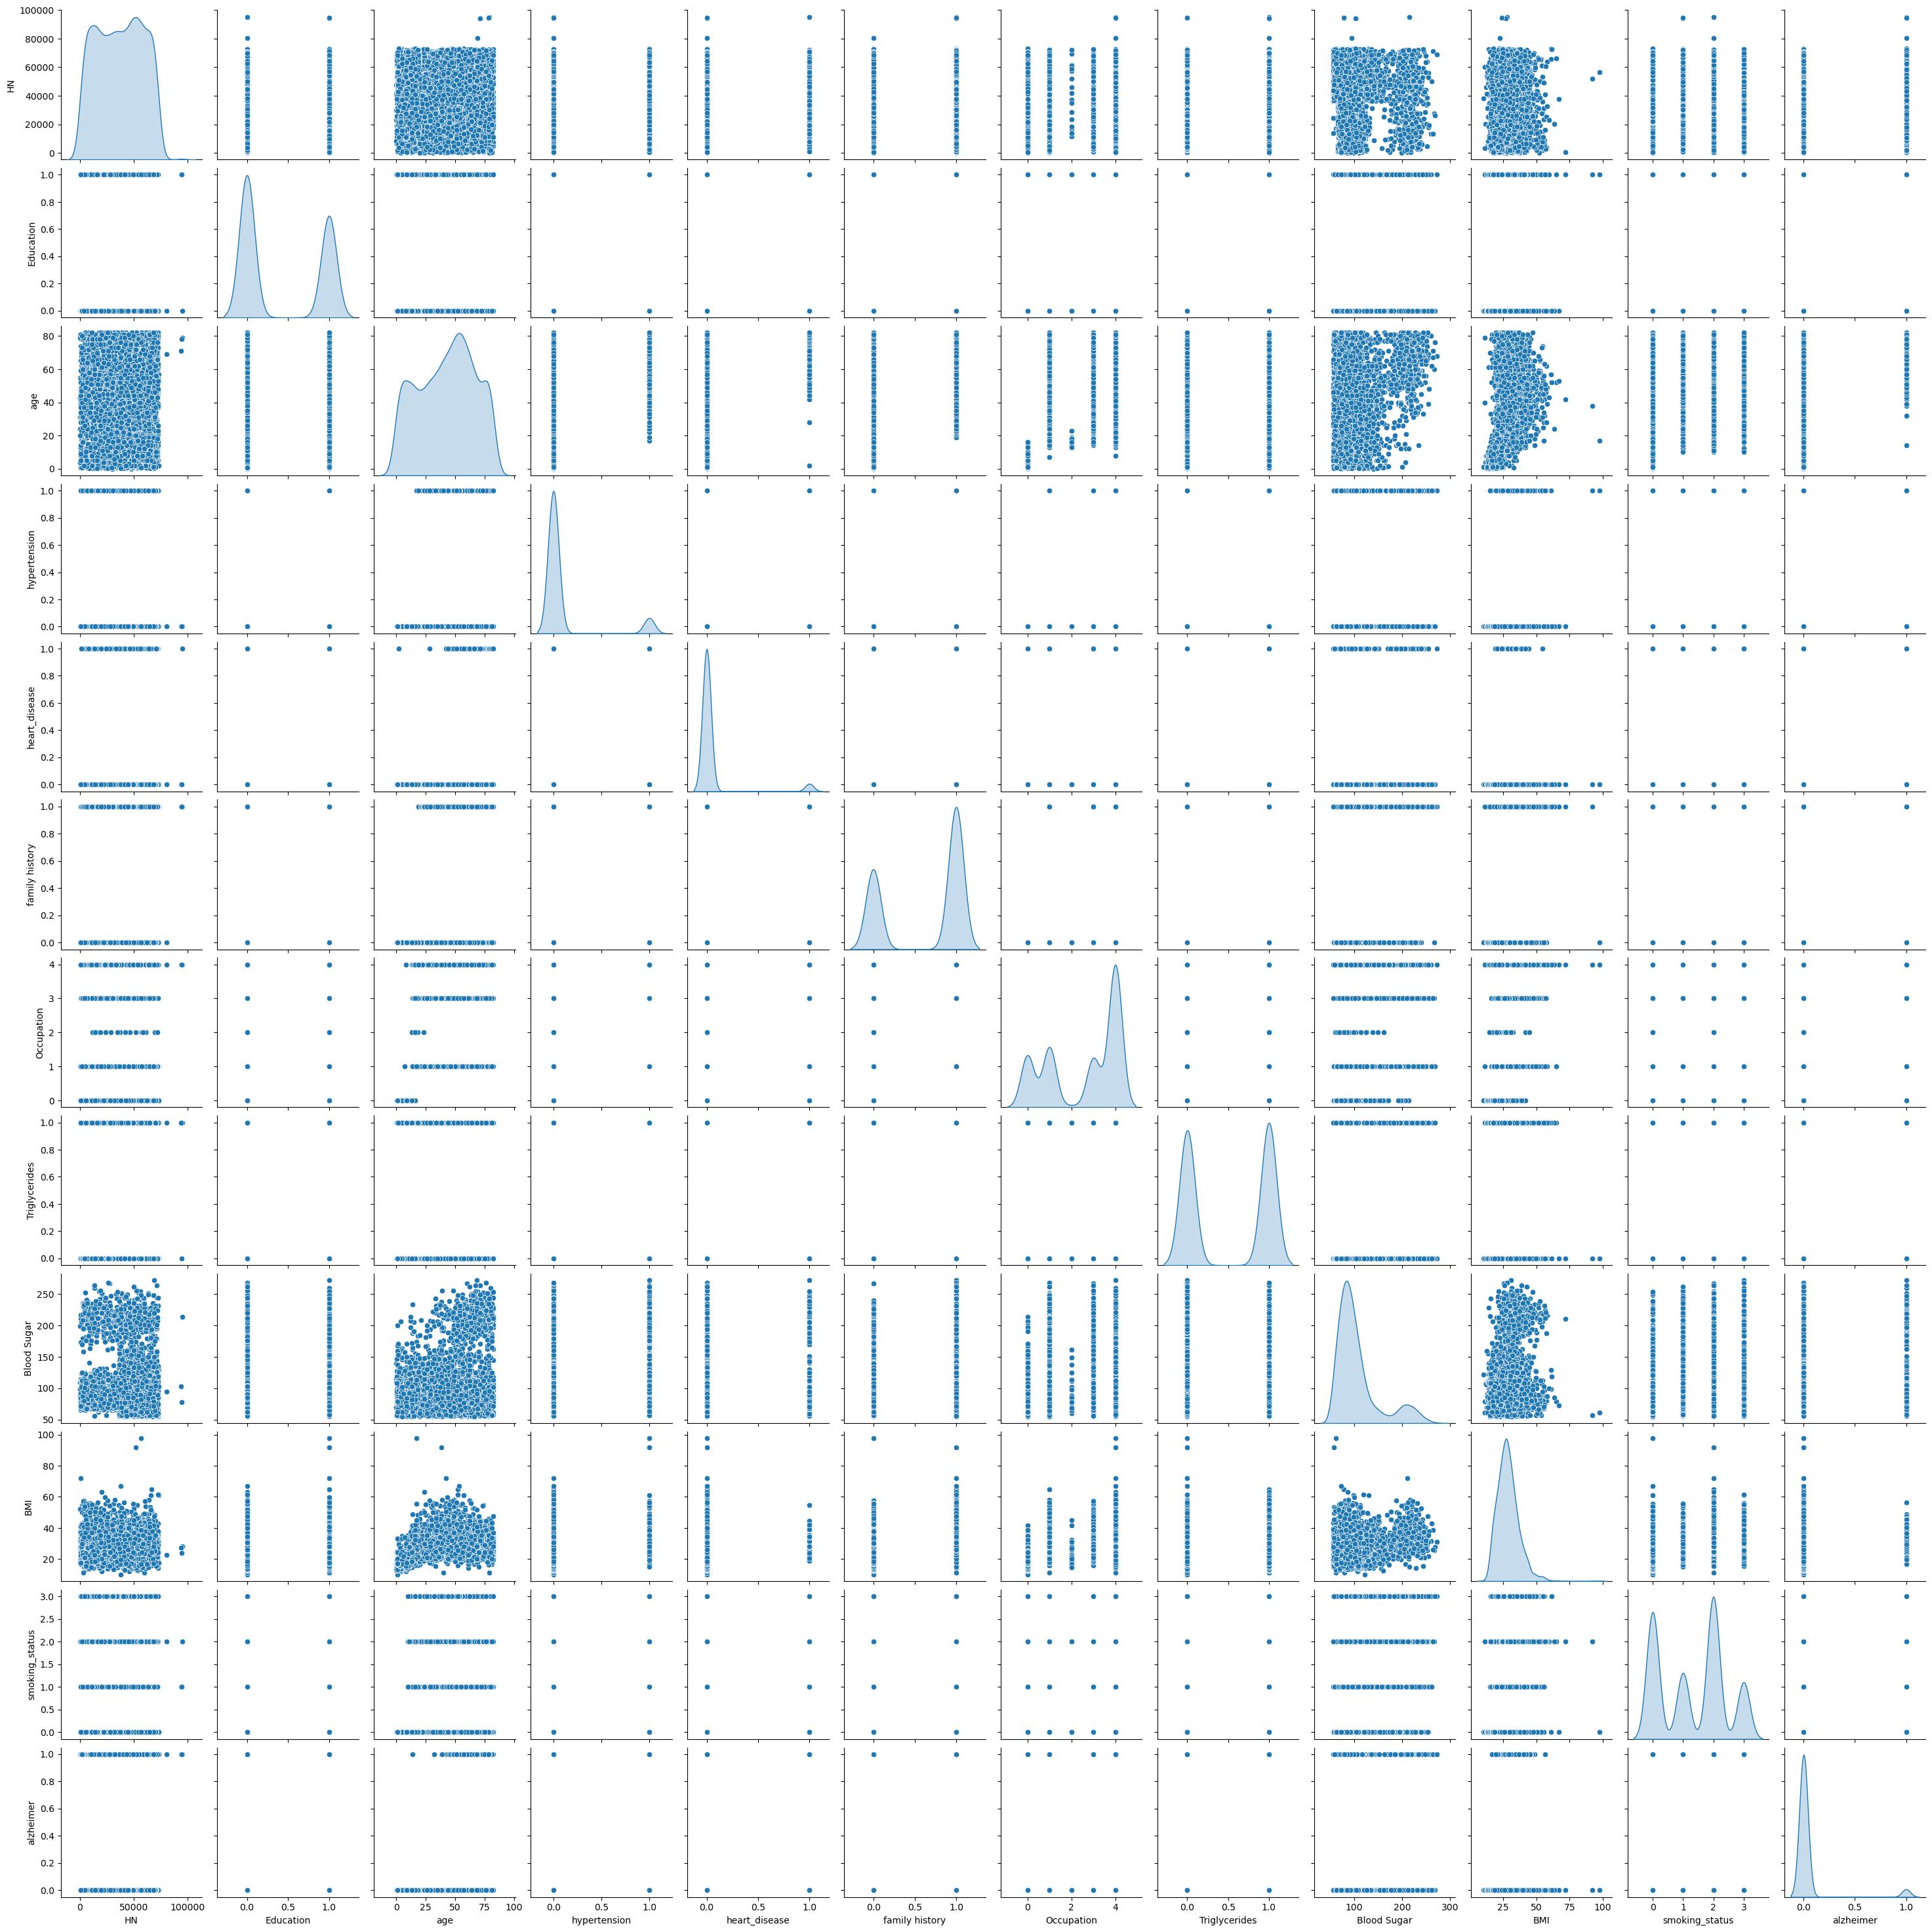

In [51]:
sns.pairplot(data=df,
             diag_kind="kde")

# Create feature and label data

In [52]:
#Remove HN of ID patiant and Label class
X = df.loc[:,~((df.columns=='alzheimer') | (df.columns=='HN'))]
X

,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status
0,1,67.0,0,1,1,4,1,228.69,36.6,1
2,1,80.0,0,1,1,4,0,105.92,32.5,2
3,0,49.0,0,0,1,4,1,171.23,34.4,3
4,0,79.0,1,0,1,1,0,174.12,24.0,2
5,1,81.0,0,0,1,4,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
4095,1,82.0,1,0,1,1,0,71.97,28.3,2
4096,0,13.0,0,0,0,0,0,103.08,18.6,0
4097,0,81.0,0,0,1,1,1,125.20,40.0,2
4098,0,35.0,0,0,1,1,0,82.99,30.6,2


In [53]:
y = df['alzheimer']
y

0       1
2       1
3       1
4       1
5       1
       ..
4095    0
4096    0
4097    0
4098    0
4099    0
Name: alzheimer, Length: 3936, dtype: int64

In [54]:
y.value_counts()

0    3734
1     202
Name: alzheimer, dtype: int64

# Split Train-Test Data

In [55]:
# Your code (use random_state=1234)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1234)

In [56]:
X_train.shape

(2755, 10)

In [57]:
y_train.value_counts()

0    2617
1     138
Name: alzheimer, dtype: int64

In [58]:
X_test.shape

(1181, 10)

In [59]:
y_test.value_counts()

0    1117
1      64
Name: alzheimer, dtype: int64

In [60]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Feature Data Scaling

In [61]:
df.std(numeric_only=True)

HN                21092.399955
Education             0.493069
age                  23.443615
hypertension          0.296413
heart_disease         0.219123
family history        0.479990
Occupation            1.611517
Triglycerides         0.499882
Blood Sugar          44.842882
BMI                   8.007153
smoking_status        1.076087
alzheimer             0.220680
dtype: float64

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [63]:
X_train_sc = scaler.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

In [64]:
X_test_sc = scaler.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [65]:
X_train_sc.std(numeric_only=True)

Education         1.000182
age               1.000182
hypertension      1.000182
heart_disease     1.000182
family history    1.000182
Occupation        1.000182
Triglycerides     1.000182
Blood Sugar       1.000182
BMI               1.000182
smoking_status    1.000182
dtype: float64

In [66]:
X_test_sc.std(numeric_only=True)

Education         0.998284
age               1.021066
hypertension      0.984222
heart_disease     1.129825
family history    0.981329
Occupation        1.014162
Triglycerides     0.999860
Blood Sugar       1.029057
BMI               1.026406
smoking_status    0.970883
dtype: float64

# Classification with ANN model

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics

In [68]:
ann = MLPClassifier(activation='relu',
                    solver='adam',
                    random_state=1234, # random number generation for weights and bias initialization
                    learning_rate='adaptive',
                    max_iter=700
                   )

In [69]:
skf = StratifiedKFold(n_splits=10,
                      shuffle=True,
                      random_state=1234)

In [70]:
parameters = {'batch_size': [16, 32, 64, 128],
              'hidden_layer_sizes': [(24, 12, 6), (64, 24, 12, 6), (200, 50, 50, 25)]
              }

In [71]:
grid_search = GridSearchCV(estimator = ann,
                           param_grid = parameters,
                           cv = skf)

In [72]:
grid_result = grid_search.fit(X_train, y_train)

In [73]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.949910 using {'batch_size': 16, 'hidden_layer_sizes': (24, 12, 6)}


Train model with best batch_size

In [74]:
ann_optimal = MLPClassifier(hidden_layer_sizes=(24, 12, 6),
                    activation='relu',
                    solver='adam',
                    random_state=1234, # random number generation for weights and bias initialization
                    learning_rate='adaptive',
                    max_iter=700,
                    batch_size=16
                   )

In [75]:
ann_optimal.fit(X=X_train_sc, y=y_train)

MLPClassifier(batch_size=16, hidden_layer_sizes=(24, 12, 6),
              learning_rate='adaptive', max_iter=700, random_state=1234)

In [76]:
y_pred_test = ann_optimal.predict(X_test_sc)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
result_df = pd.DataFrame(y_pred_test)
result_df.value_counts()

0    1136
1      45
dtype: int64

# Performance of ANN model

In [78]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_test, labels=[0,1])

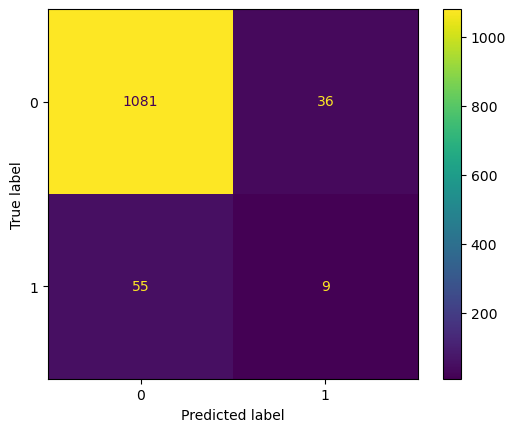

In [79]:
metrics.ConfusionMatrixDisplay(conf_mat,
                               display_labels=[0,1]).plot()

In [80]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1117
           1       0.20      0.14      0.17        64

    accuracy                           0.92      1181
   macro avg       0.58      0.55      0.56      1181
weighted avg       0.91      0.92      0.92      1181

